In [73]:
words = open('repo\\names.txt').read().splitlines()

In [74]:
print(f'Stats about our data set\n-------------')
print(f'Total amount of lines/names: {len(words)}')
print(f'Smallest name size: {min(len(w) for w in words)}')
print(f'Largest name size: {max(len(w) for w in words)}')

Stats about our data set
-------------
Total amount of lines/names: 32033
Smallest name size: 2
Largest name size: 15


In [75]:
# First we want to build a bigram language model. In other words, a model which predicts the next character based on the current character.
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E


In [76]:
b = {}
for w in words:
    word = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(word, word[1:]):
        bigram = ch1 + ch2
        b[bigram] = b.get(bigram,0) + 1

In [77]:
print('Stats about our bigrams\n------------')
print(b.items())
print(f'Most used bigram (may have some with the same usage): {sorted(b.items(), key= lambda kv: kv[1])[len(b.items()) - 1:]}')
print(f'Least used bigram (may have some with the same usage): {sorted(b.items(), key= lambda kv: kv[1])[0]}')

Stats about our bigrams
------------
dict_items([('<S>e', 1531), ('em', 769), ('mm', 168), ('ma', 2590), ('a<E>', 6640), ('<S>o', 394), ('ol', 619), ('li', 2480), ('iv', 269), ('vi', 911), ('ia', 2445), ('<S>a', 4410), ('av', 834), ('va', 642), ('<S>i', 591), ('is', 1316), ('sa', 1201), ('ab', 541), ('be', 655), ('el', 3248), ('ll', 1345), ('la', 2623), ('<S>s', 2055), ('so', 531), ('op', 95), ('ph', 204), ('hi', 729), ('<S>c', 1542), ('ch', 664), ('ha', 2244), ('ar', 3264), ('rl', 413), ('lo', 692), ('ot', 118), ('tt', 374), ('te', 716), ('e<E>', 3983), ('<S>m', 2538), ('mi', 1256), ('am', 1634), ('me', 818), ('<S>h', 874), ('rp', 14), ('pe', 197), ('er', 1958), ('r<E>', 1377), ('ev', 463), ('ve', 568), ('ly', 1588), ('yn', 1826), ('n<E>', 6763), ('bi', 217), ('ig', 428), ('ga', 330), ('ai', 1650), ('il', 1345), ('l<E>', 1314), ('y<E>', 2007), ('iz', 277), ('za', 860), ('et', 580), ('th', 647), ('h<E>', 2409), ('ry', 773), ('of', 34), ('fi', 160), ('ca', 815), ('ri', 3033), ('sc', 60)

In [78]:
# we want to use two dimensions array rather than python dictionary. For that we use a library named pytorch
import torch

In [79]:
# we build an array that can countains our bigram. The dimensions of our array are 28 since there are 26 characters + 2 special starting/ending characters.
N = torch.zeros((26+2,26+2), dtype=torch.int32)

In [80]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [81]:
for w in words:
    word = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] +=1 

In [82]:
# import this library to better vizualize
import matplotlib.pyplot as plt
%matplotlib inline

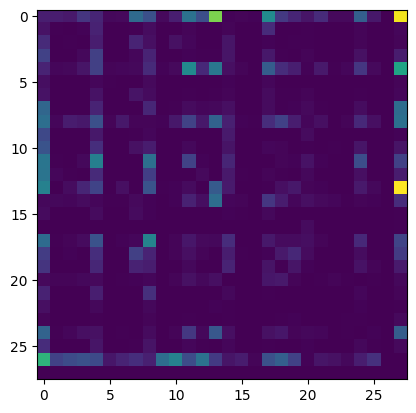

In [83]:
plt.imshow(N)